# Project: Identify Customer Segments for AZ Direct and Arvato Financial Solutions

In this project, we will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that we will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.


# Show workspace status

In [ ]:
import sklearn
from platform import python_version

print(f'The scikit-learn version is {(sklearn.__version__)}')
print(f'The python version is {(python_version())}.')

The scikit-learn version is 1.0.2
The python version is 3.7.13.


In [ ]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 



# magic word for producing visualizations in notebook
%matplotlib inline


# Ignore Warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)


# change pandas show rule for rows to 200 & columns to 200
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns



> Tip: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut esc --> a (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and esc --> b adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use esc --> m and to convert to a code cell, use esc --> y.





In [ ]:
# Load in the general demographics data.
azdias = pd.read_csv("/content/drive/MyDrive/Data/Udacity_AZDIAS_Subset.csv",
                     sep = ";")

# Load in the feature summary file.
feat_info =pd.read_csv("/content/drive/MyDrive/Data/AZDIAS_Feature_Summary.csv",
                       sep = ";")

In [ ]:
feat_info.shape

(85, 4)

In [ ]:
# Check the structure of the data 
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [ ]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [ ]:
azdias.shape

(891221, 85)

In [ ]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

In [ ]:
# Identify missing or unknown data values 
feat_info['missing_or_unknown']=(
    feat_info['missing_or_unknown']
    .replace(to_replace =['\[', '\]'], value = '', regex = True
            )
    ).str.split(',')

In [ ]:
feat_info['missing_or_unknown']

0        [-1, 0]
1     [-1, 0, 9]
2        [-1, 0]
3            [0]
4           [-1]
5           [-1]
6           [-1]
7           [-1]
8           [-1]
9           [-1]
10          [-1]
11           [0]
12            []
13            []
14       [-1, 0]
15           [0]
16           [0]
17           [0]
18           [0]
19           [0]
20           [0]
21       [-1, 0]
22       [-1, 0]
23           [0]
24       [-1, 9]
25       [-1, 9]
26       [-1, 9]
27       [-1, 9]
28       [-1, 9]
29       [-1, 9]
30       [-1, 9]
31       [-1, 9]
32       [-1, 9]
33       [-1, 9]
34       [-1, 9]
35       [-1, 9]
36       [-1, 9]
37       [-1, 9]
38          [-1]
39          [-1]
40       [-1, 0]
41          [-1]
42       [-1, 9]
43           [0]
44            []
45            []
46       [-1, 0]
47          [-1]
48       [-1, 0]
49       [-1, 0]
50           [0]
51            []
52       [-1, 0]
53            []
54           [0]
55          [-1]
56          [-1]
57       [-1, X]
58          [X

In [ ]:
#convert and unkowen missing and unknown value  into `NaN`

for attribute , missing in zip(feat_info['attribute'] , feat_info['missing_or_unknown']):
    for value in missing:
        if value != '' and value != 'X' and value != 'XX':
            # print(value)
            azdias.loc[azdias[attribute] == int(value), attribute] = np.nan #Check SettingwithCopyWarning: How to Fix This Warning in Pandas
       
azdias.replace({'X':np.nan,
                'XX':np.nan},inplace=True) 

In [ ]:
feat_info.drop(columns =["information_level","type"] )

,attribute,missing_or_unknown
0,AGER_TYP,"[-1, 0]"
1,ALTERSKATEGORIE_GROB,"[-1, 0, 9]"
2,ANREDE_KZ,"[-1, 0]"
3,CJT_GESAMTTYP,[0]
4,FINANZ_MINIMALIST,[-1]
5,FINANZ_SPARER,[-1]
6,FINANZ_VORSORGER,[-1]
7,FINANZ_ANLEGER,[-1]
8,FINANZ_UNAUFFAELLIGER,[-1]
9,FINANZ_HAUSBAUER,[-1]


In [ ]:
# Check for the effect 
for col in azdias.columns:
    print(azdias[col].value_counts())
    print(50*"*")


2.0    98472
1.0    79802
3.0    27104
Name: AGER_TYP, dtype: int64
**************************************************
3.0    358533
4.0    228510
2.0    158410
1.0    142887
Name: ALTERSKATEGORIE_GROB, dtype: int64
**************************************************
2.0    465305
1.0    425916
Name: ANREDE_KZ, dtype: int64
**************************************************
4.0    210963
3.0    156449
6.0    153915
2.0    148795
5.0    117376
1.0     98869
Name: CJT_GESAMTTYP, dtype: int64
**************************************************
3.0    256276
5.0    168863
4.0    167182
2.0    159313
1.0    139587
Name: FINANZ_MINIMALIST, dtype: int64
**************************************************
1.0    250213
4.0    201223
2.0    153051
5.0    146380
3.0    140354
Name: FINANZ_SPARER, dtype: int64
**************************************************
5.0    242262
3.0    229842
4.0    198218
2.0    116530
1.0    104369
Name: FINANZ_VORSORGER, dtype: int64
**********************************

#### Step 1.1.2: Assess Missing Data in Each Column


AGER_TYP                 76.955435
ALTERSKATEGORIE_GROB      0.323264
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR              44.020282
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP               12.476816
LP_LEBENSPHASE_FEIN      10.954859
LP_LEBENSPHASE_GROB      10.611509
LP_FAMILIE_FEIN           8.728699
LP_FAMILIE_GROB           8.728699
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

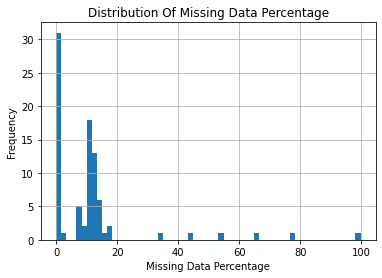

In [ ]:
#  Identify how much missing data there is in each column of the dataset.
missing_col = (azdias.isnull().sum()/len(azdias))*100

# plot the missing values propotion
missing_col.hist(bins=60)
plt.xlabel("Missing Data Percentage")
plt.ylabel('Frequency')
plt.title('Distribution Of Missing Data Percentage');

missing_col

In [ ]:
missing_col.sort_values(ascending=False)

TITEL_KZ                 99.757636
AGER_TYP                 76.955435
KK_KUNDENTYP             65.596749
KBA05_BAUMAX             53.468668
GEBURTSJAHR              44.020282
ALTER_HH                 34.813699
KKK                      17.735668
REGIOTYP                 17.735668
W_KEIT_KIND_HH           16.605084
KBA05_ANTG1              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG3              14.959701
KBA05_ANTG4              14.959701
KBA05_GBZ                14.959701
MOBI_REGIO               14.959701
PLZ8_ANTG3               13.073637
PLZ8_ANTG2               13.073637
PLZ8_GBZ                 13.073637
PLZ8_HHZ                 13.073637
PLZ8_ANTG1               13.073637
PLZ8_BAUMAX              13.073637
PLZ8_ANTG4               13.073637
VERS_TYP                 12.476816
HEALTH_TYP               12.476816
SHOPPER_TYP              12.476816
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
KBA13_ANZAHL_PKW         11.871354
ANZ_HAUSHALTE_AKTIV 

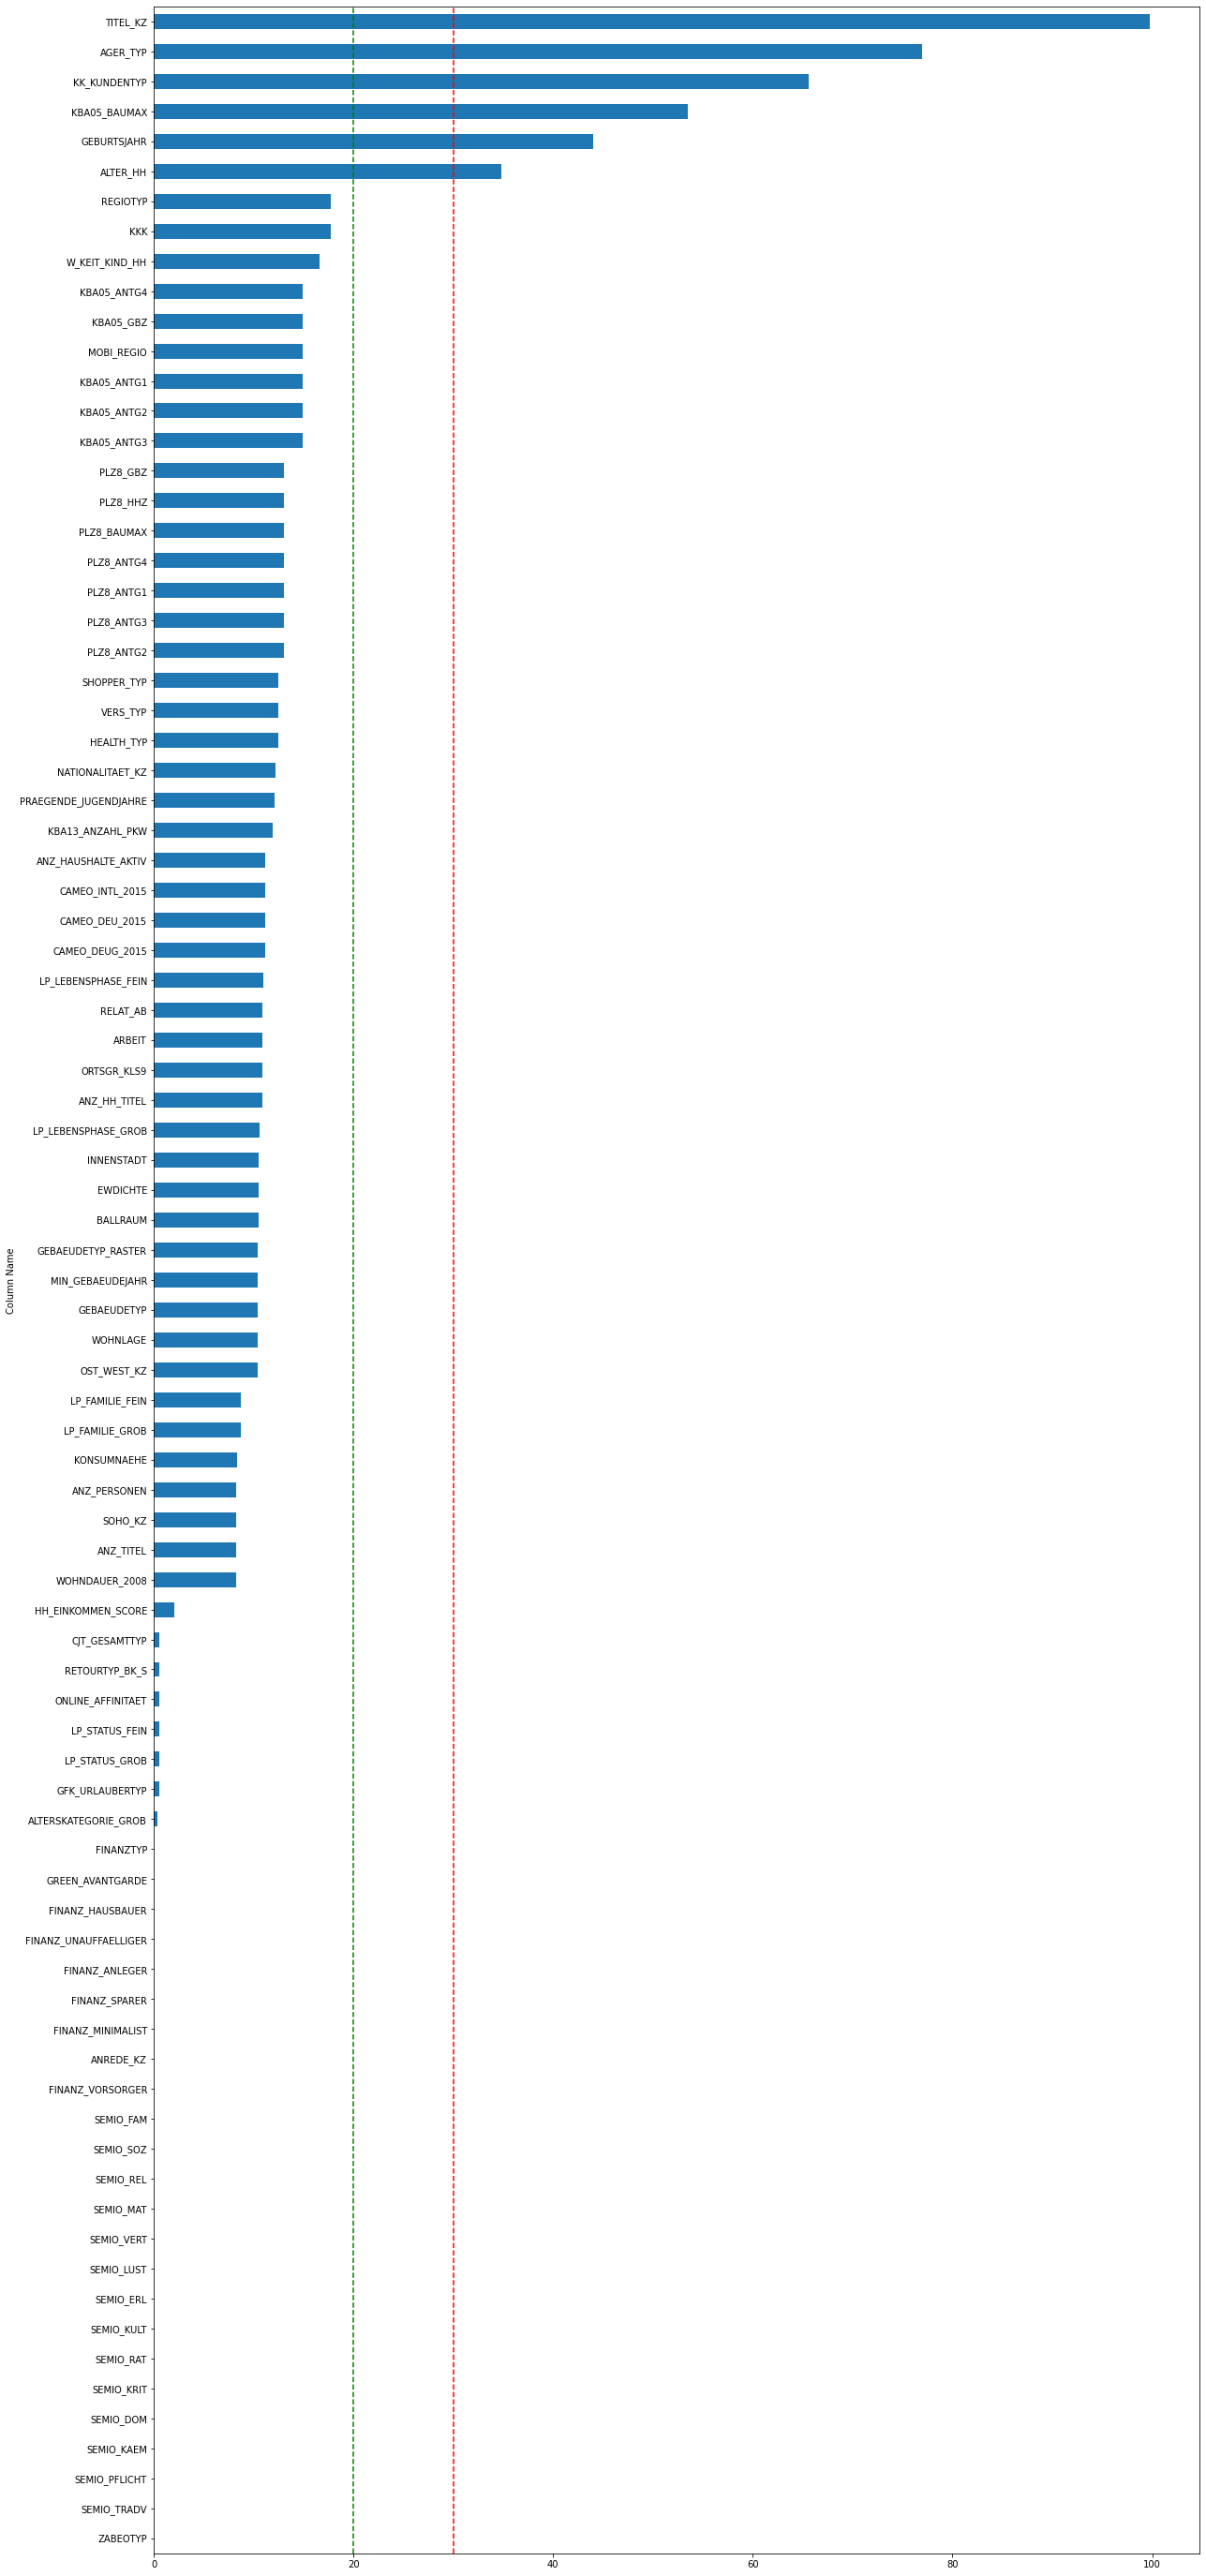

In [ ]:
# Investigate patterns in the amount of missing data in each column.

missing_col.sort_values(ascending=True).plot(
    kind ='barh',
    xlabel = "Column Name",
    ylabel='Missing Data Percentage',
    figsize=(20,50))

plt.axvline(30, linestyle = "--" ,color = "red" )
plt.axvline(20, linestyle = "--" ,color = "green" );



In [ ]:
# Create a list for high `NAN` Columns
drop_cols = [col for col in azdias.columns  if (azdias[col].isnull().sum()/len(azdias))*100 > 30]
drop_cols
print((drop_cols))

['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']


In [ ]:
print(feat_info.shape[0])
print(azdias.shape[1])

85
85


In [ ]:
# Remove the outlier columns from the dataset
azdias.drop(drop_cols , axis =1 , inplace=True )

# Remove the outlier columns from feat dataset
for col in drop_cols:
    feat_info.drop(feat_info[feat_info['attribute'] == col].index, inplace = True)

In [ ]:
# Check after dropping high `NAN` Columns
print(feat_info.shape[0])
print(azdias.shape[1])

79
79


#### Discussion 1.1.2: Assess Missing Data in Each Column

**As we can tell from the above cells we have 6 columns with more than 30% NaN values ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX] ,thus we need to drop them as our results don't have a bias toward the filling value.**

#### Step 1.1.3: Assess Missing Data in Each Row



0         43
1          0
2          0
3          7
4          0
          ..
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64

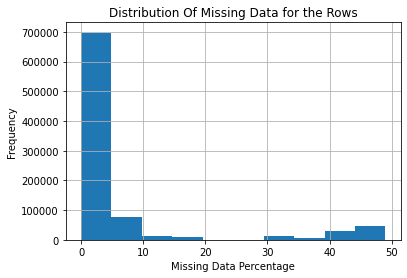

In [ ]:
# How much data is missing in each row of the dataset?
missing_row = (azdias.isnull().sum(axis=1))

#plot the missing values  for rows
missing_row.hist(bins=10)
plt.xlabel("Missing Data Percentage")
plt.ylabel('Frequency')
plt.title('Distribution Of Missing Data for the Rows');

missing_row

In [ ]:
# Divide the data into two subsets based on the number of missing values
#  in each row (threshold = 20 ).

missing_row_low =azdias[azdias.isnull().sum(axis=1) <= 20]

missing_row_high = azdias[azdias.isnull().sum(axis=1) > 20]

missing_row_high.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,93698.000000,93795.000000,93575.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93575.000000,93795.000000,19016.000000,45814.000000,46053.000000,47124.000000,47124.000000,93575.000000,93575.000000,19113.000000,14089.000000,93575.000000,93795.00000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,93795.000000,19016.000000,20296.000000,19016.000000,93795.000000,20296.000000,20296.000000,75447.000000,4707.000000,20296.000000,514.000000,515.000000,647.000000,19894.000000,647.000000,647.000000,7.000000,7.000000,7.000000,7.000000,7.000000,646.000000,646.000000,646.000000,645.000000,164.000000,7.000000,93575.000000,164.000000,252.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,638.000000,639.000000,638.000000
mean,2.434043,1.528003,4.736757,3.207239,3.716701,3.129474,4.672339,4.718279,2.735263,3.720422,6.326914,0.000618,1.827882,16.681233,5.091199,4.100182,2.458280,4.795009,2.199092,1.182860,9.325147,3.223350,2.28929,5.629884,6.339709,4.977056,1.864982,4.573165,3.283203,3.111733,4.050653,6.586502,5.630812,5.727128,4.865931,3.126595,2.056479,0.008672,1.239851,3.221824,1.658061,0.004533,2.015680,1.807096,7.818634,4.342412,0.029126,1.879444,2.838896,2008.933539,3.017002,1.285714,1.000000,0.285714,0.142857,4.285714,4.219814,3.609907,4.809598,3.844961,2.542683,4.000000,2.408816,4.121951,717.468254,2.666667,2.333333,1.000000,0.333333,1.111111,3.666667,3.888889,2.909091,5.004695,2.843260
std,0.869335,0.499218,1.645789,0.654998,0.860038,0.638028,0.890448,0.747114,0.647694,0.770838,2.882656,0.024859,0.663367,12.551877,3.844127,4.014537,1.733153,2.474574,1.079417,0.488562,4.346468,1.035594,0.95170,1.298263,1.529974,0.770195,1.910576,1.109928,1.034690,0.955974,0.688353,1.342259,1.116427,1.051807,0.342351,0.939810,0.994154,0.092719,0.427003,0.717492,1.132010,0.079906,0.159545,0.868640,1.986074,5.899704,0.190039,1.539268,1.524126,6.000276,2.789524,0.951190,0.816497,0.755929,0.377964,1.496026,2.141066,1.727882,2.021428,0.997276,0.980488,1.632993,1.151366,1.836175,345.279024,1.000000,0.866025,0.866025,0.500000,0.333333,0.707107,1.054093,0.991904,2.413061,1.333264
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,77.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,3.000000,

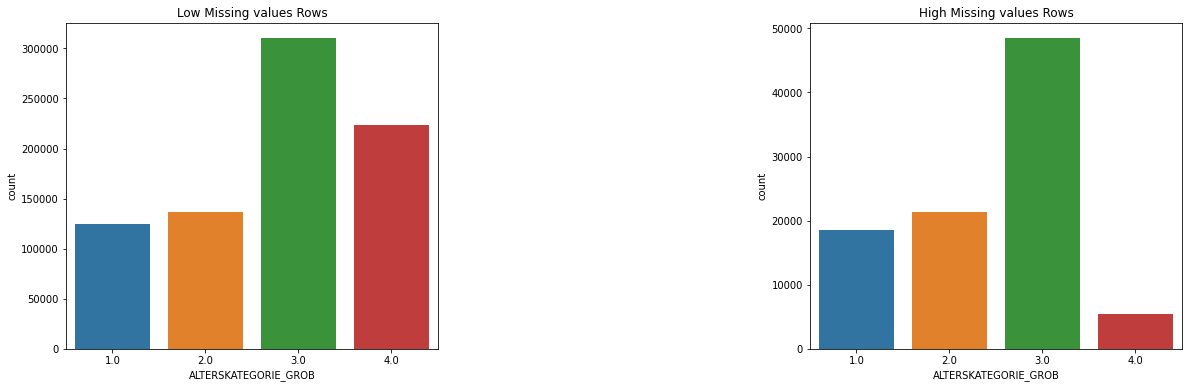

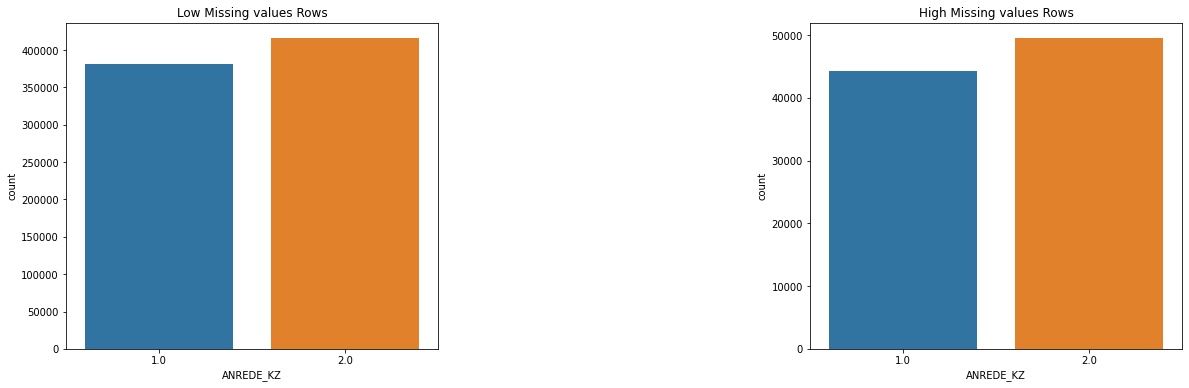

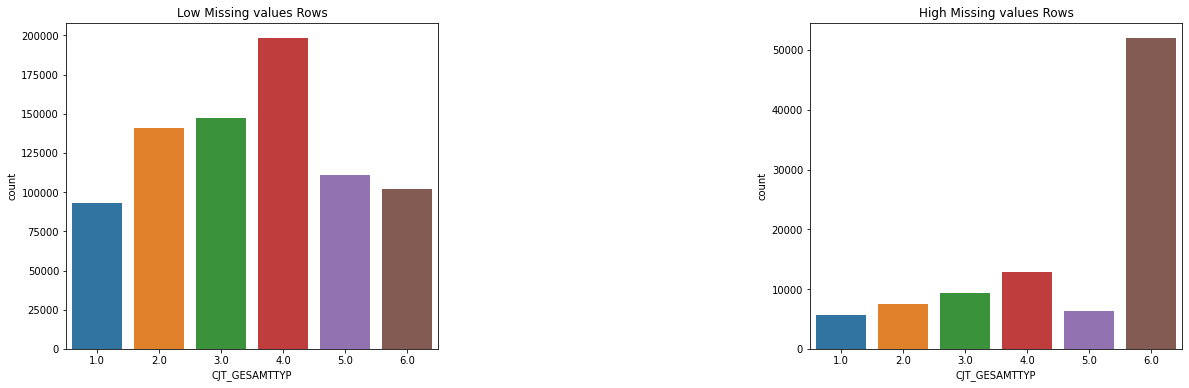

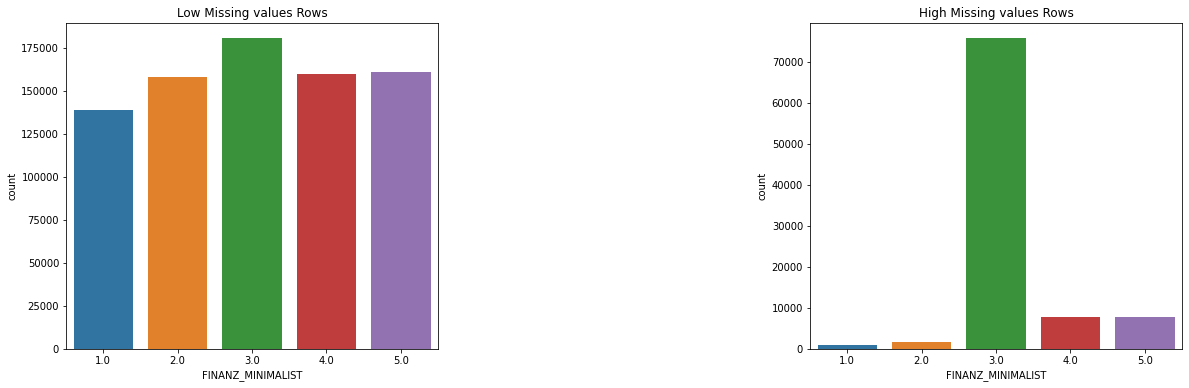

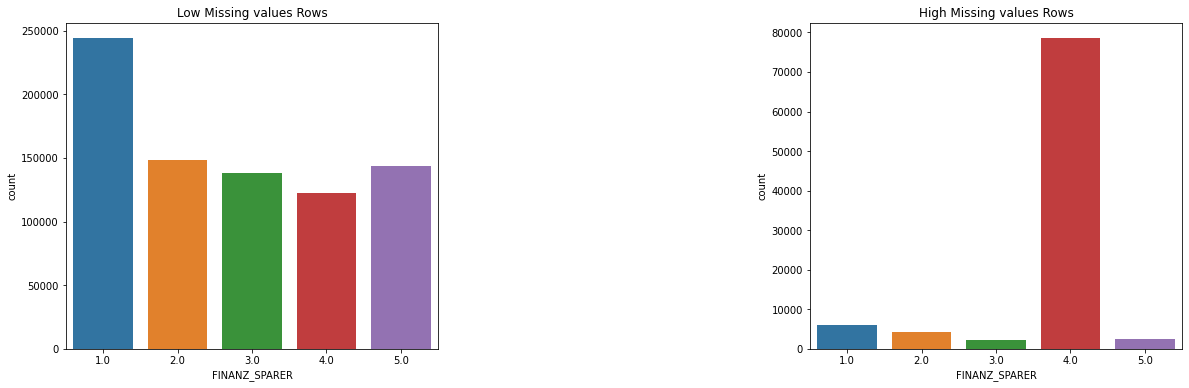

In [ ]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def compare(subset_1, subset_2, dataframe,col_nums):
    """
    Compare the missing values between 2 subsets from the Dataframe 
    for different columns 
    
    Args:
        subset_1: The first subset of the data of the comparison.
        subset_2: The second subset of the data of the comparison.
        dataframe: The dataframe that contains the subsets.
        col_nums : The number of columns from dataframe for the comparison.

    Returns: 
        A graph contain  comparison between the 2 subsets for the different
         columns of the dataframe that have been set in the functhion  
    """

    for col in dataframe.columns[:col_nums]:
        fig, ax = plt.subplots(1, 2,figsize=(20,6))
        plt.subplots_adjust(wspace=1)
        sns.countplot(subset_1[col], ax=ax[0])
        ax[0].set_title('Low Missing values Rows')
        sns.countplot(subset_2[col], ax=ax[1])
        ax[1].set_title('High Missing values Rows')

    return fig.show();

          


compare(missing_row_low,missing_row_high,azdias,5)

In [ ]:
print(f"The Number of rows for the full data set is {azdias.shape[0]}\n")
print(f"The Number of rows that have missing data is {len(missing_row)-len(missing_row[missing_row == 0])}\n")
print(f"The Number of rows that have missing data in less than 20 colunms or no missing values at all is {len(missing_row_low)}\n")
print(f"The Number of rows that have missing data in more than 20 colunms is {len(missing_row_high)} ")

The Number of rows for the full data set is 891221

The Number of rows that have missing data is 268012

The Number of rows that have missing data in less than 20 colunms or no missing values at all is 797426

The Number of rows that have missing data in more than 20 colunms is 93795 


#### Discussion 1.1.3: Assess Missing Data in Each Row

**- As we can tell from the cell above that 267798 row of the data contain missing values.**

**- Thus, we divided them into 2 subsets with a threshold of 20 values for each row then we compare the distribution of 2 subsets for at least five columns where there are no or few missing values and many missing values .**

**- The distributions of the 2 subsets are independent and different.**
 
**- We can move on with the subset with a low missing value (below 20 values for each row or non ) and drop the other subset as it contains a high number of missing values.**

In [ ]:
# Drop high `Nan` rows 
df = missing_row_low
df.shape

(797426, 79)

### Step 1.2: Select and Re-Encode Features



In [ ]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]


In [ ]:
# How many features are there of each data type?
feat_info["type"].value_counts()

ordinal        49
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features


In [ ]:
from numpy.ma.core import sort
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
feat_info_cat = feat_info[feat_info["type"] == "categorical"]
cat_mask = feat_info_cat["attribute"]
cat_df=(
    df[cat_mask]
    .nunique()
    .sort_values()
)
cat_df

ANREDE_KZ            2
OST_WEST_KZ          2
VERS_TYP             2
SOHO_KZ              2
GREEN_AVANTGARDE     2
NATIONALITAET_KZ     3
SHOPPER_TYP          4
LP_STATUS_GROB       5
LP_FAMILIE_GROB      5
FINANZTYP            6
ZABEOTYP             6
CJT_GESAMTTYP        6
GEBAEUDETYP          7
CAMEO_DEUG_2015      9
LP_STATUS_FEIN      10
LP_FAMILIE_FEIN     11
GFK_URLAUBERTYP     12
CAMEO_DEU_2015      44
dtype: int64

In [ ]:
# binary categoricals cols
bi_cat =cat_df[cat_df == 2]
bi_cat

ANREDE_KZ           2
OST_WEST_KZ         2
VERS_TYP            2
SOHO_KZ             2
GREEN_AVANTGARDE    2
dtype: int64

In [ ]:
# multi-level categoricals cols
multi_lvl_cat = cat_df[cat_df  > 2]
multi_lvl_cat

NATIONALITAET_KZ     3
SHOPPER_TYP          4
LP_STATUS_GROB       5
LP_FAMILIE_GROB      5
FINANZTYP            6
ZABEOTYP             6
CJT_GESAMTTYP        6
GEBAEUDETYP          7
CAMEO_DEUG_2015      9
LP_STATUS_FEIN      10
LP_FAMILIE_FEIN     11
GFK_URLAUBERTYP     12
CAMEO_DEU_2015      44
dtype: int64

In [ ]:
df[cat_mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797426 entries, 1 to 891220
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ANREDE_KZ         797426 non-null  float64
 1   CJT_GESAMTTYP     792792 non-null  float64
 2   FINANZTYP         797426 non-null  float64
 3   GFK_URLAUBERTYP   792792 non-null  float64
 4   GREEN_AVANTGARDE  797426 non-null  int64  
 5   LP_FAMILIE_FEIN   766305 non-null  float64
 6   LP_FAMILIE_GROB   766305 non-null  float64
 7   LP_STATUS_FEIN    792792 non-null  float64
 8   LP_STATUS_GROB    792792 non-null  float64
 9   NATIONALITAET_KZ  763793 non-null  float64
 10  SHOPPER_TYP       761009 non-null  float64
 11  SOHO_KZ           797426 non-null  float64
 12  VERS_TYP          761009 non-null  float64
 13  ZABEOTYP          797426 non-null  float64
 14  GEBAEUDETYP       797426 non-null  float64
 15  OST_WEST_KZ       797426 non-null  object 
 16  CAMEO_DEUG_2015   79

In [ ]:
# Re-encode `"OST_WEST_KZ"` col to be kept in the analysis.
# Check the values in `"OST_WEST_KZ"` col
"""
3.6. OST_WEST_KZ
Building location via former East / West Germany (GDR / FRG)
-1: unknown
O: East (GDR)
W: West (FRG)
"""


df["OST_WEST_KZ"].value_counts()

W    628987
O    168439
Name: OST_WEST_KZ, dtype: int64

In [ ]:
# Re-encode `"OST_WEST_KZ"` col
pd.set_option('mode.chained_assignment', None)
df["OST_WEST_KZ"] =(df["OST_WEST_KZ"] == "W").astype(int)

In [ ]:
#Check after Re-encode
df["OST_WEST_KZ"].value_counts()

1    628987
0    168439
Name: OST_WEST_KZ, dtype: int64

In [ ]:
# Drop multi-level categoricals cols
drop_cols =  [col for col in multi_lvl_cat.index]
df.drop(drop_cols , axis =1 , inplace=True )

In [ ]:
# Ckeck after dropping
df.shape

(797426, 66)

#### Discussion 1.2.1: Re-Encode Categorical Features

**- The data has 18 categorical columns, 5 are binary (two-level) categorical and 13 are multi-level categorical**.

**- The binary (two-level) categorical columns which we will move on with our analysis are numerical values, however  after investigating it turned out  that 1 of those columns is an object for its type so we have to re-encode it, after looking at the Data Dictionary we found the following:**
 - 3.6. OST_WEST_KZ
    Building location via former East / West Germany (GDR / FRG)
   - O: East (GDR)
   - W: West (FRG)

- Thus , we endcond 0 for east and 1 for the west 

**- On the hand, the multi-level categorical columns will be dropped to keep things straightforward.**

#### Step 1.2.2: Engineer Mixed-Type Features



In [ ]:
# Assess mixed variables
feat_info_mix = feat_info[feat_info["type"] == "mixed"]
feat_info_mix 

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1, 0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1, XX]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1, 0]"


In [ ]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
"""
1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)

-1: unknown
0: unknown
1: 40s - war years (Mainstream, E+W)
2: 40s - reconstruction years (Avantgarde, E+W)
3: 50s - economic miracle (Mainstream, E+W)
4: 50s - milk bar / Individualisation (Avantgarde, E+W)
5: 60s - economic miracle (Mainstream, E+W)
6: 60s - generation 68 / student protestors (Avantgarde, W)
7: 60s - opponents to the building of the Wall (Avantgarde, E)
8: 70s - family orientation (Mainstream, E+W)
9: 70s - peace movement (Avantgarde, E+W)
10: 80s - Generation Golf (Mainstream, W)
11: 80s - ecological awareness (Avantgarde, W)
12: 80s - FDJ / communist party youth organisation (Mainstream, E)
13: 80s - Swords into ploughshares (Avantgarde, E)
14: 90s - digital media kids (Mainstream, E+W)
15: 90s - ecological awareness (Avantgarde, E+W)

"""

PRAEGENDE_JUGENDJAHRE=(
    df["PRAEGENDE_JUGENDJAHRE"]
    .value_counts()
    .sort_values()
)
PRAEGENDE_JUGENDJAHRE

7.0       4009
13.0      5759
2.0       7479
4.0      20450
1.0      20662
12.0     24440
6.0      25651
9.0      33563
11.0     35735
15.0     42521
3.0      53822
5.0      84665
10.0     85767
8.0     141542
14.0    182903
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

In [ ]:
# Creat a new Decade column
df["Adolescence_Decade"] =(
    df["PRAEGENDE_JUGENDJAHRE"]
    .replace(  { 1:1, 
                 2:1, 
                 3:2,
                 4:2,
                 5:3,
                 6:3,
                 7:3, 
                 8:4,
                 9:4,
                10:5,
                11:5, 
                12:5,
                13:5,
                14:6,
                15:6}
         )
)
df["Adolescence_Decade"].value_counts()

6.0    225424
4.0    175105
5.0    151701
3.0    114325
2.0     74272
1.0     28141
Name: Adolescence_Decade, dtype: int64

In [ ]:
# Create new movement column
df["Adolescence_Mainstream"] =(
    df["PRAEGENDE_JUGENDJAHRE"]
        .replace(  {1:1, 
                    2:0, 
                    3:1,
                    4:0,
                    5:1,
                    6:0,
                    7:0, 
                    8:1,
                    9:0,
                    10:1,
                    11:0, 
                    12:1,
                    13:0,
                    14:1,
                    15:0}
            )
)
df["Adolescence_Mainstream"].value_counts()

1.0    593801
0.0    175167
Name: Adolescence_Mainstream, dtype: int64

In [ ]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
"""
4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code

-1: unknown
11: Wealthy Households - Pre-Family Couples & Singles
12: Wealthy Households - Young Couples With Children
13: Wealthy Households - Families With School Age Children
14: Wealthy Households - Older Families & Mature Couples
15: Wealthy Households - Elders In Retirement
21: Prosperous Households - Pre-Family Couples & Singles
22: Prosperous Households - Young Couples With Children
23: Prosperous Households - Families With School Age Children
24: Prosperous Households - Older Families & Mature Couples
25: Prosperous Households - Elders In Retirement
31: Comfortable Households - Pre-Family Couples & Singles
32: Comfortable Households - Young Couples With Children
33: Comfortable Households - Families With School Age Children
34: Comfortable Households - Older Families & Mature Couples
35: Comfortable Households - Elders In Retirement
41: Less Affluent Households - Pre-Family Couples & Singles
42: Less Affluent Households - Young Couples With Children
43: Less Affluent Households - Families With School Age Children
44: Less Affluent Households - Older Families & Mature Couples
45: Less Affluent Households - Elders In Retirement
51: Poorer Households - Pre-Family Couples & Singles
52: Poorer Households - Young Couples With Children
53: Poorer Households - Families With School Age Children
54: Poorer Households - Older Families & Mature Couples
55: Poorer Households - Elders In Retirement
XX: unknown
"""

CAMEO_INTL_2015=(
    df["CAMEO_INTL_2015"]
    .value_counts()
    .sort_values()
)
CAMEO_INTL_2015




33      9928
32     10346
35     10352
12     13234
44     14817
15     16966
34     18517
31     18979
52     20538
55     23939
45     26126
13     26311
23     26667
22     33137
25     39605
54     45376
43     56653
14     62851
24     91099
41     92309
51    133673
Name: CAMEO_INTL_2015, dtype: int64

In [ ]:
# Create a new Wealth column 
df["CAMEO_INTL_2015_Wealth"] = (
    df["CAMEO_INTL_2015"]
    .apply(lambda x : int(str(x)[0]) if( str(x) != 'nan' ) else None ) 
    )

df["CAMEO_INTL_2015_Wealth"].value_counts()

5.0    223526
2.0    190508
4.0    189905
1.0    119362
3.0     68122
Name: CAMEO_INTL_2015_Wealth, dtype: int64

In [ ]:
# Create a new life_stage column 

df["CAMEO_INTL_2015_life_stage"] = (
    df["CAMEO_INTL_2015"]
    .apply(lambda x : int(str(x)[1]) if( str(x) != 'nan' ) else None ) 
    )

df["CAMEO_INTL_2015_life_stage"].value_counts()

1.0    244961
4.0    232660
3.0    119559
5.0    116988
2.0     77255
Name: CAMEO_INTL_2015_life_stage, dtype: int64

In [ ]:
# Drop Mixed cols
drop_cols =  [col for col in feat_info_mix.attribute]
df.drop(drop_cols , axis =1 , inplace=True )
df.shape

(797426, 64)

#### Discussion 1.2.2: Engineer Mixed-Type Features

**- The data has 6 Mixed columns .**

**- "PRAEGENDE_JUGENDJAHRE" column combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). as it mention on the Data Dictionary.**
- **It contains values from 1 to 15 representing the era from the 40s to 90s mixed with movement (mainstream vs. avant-garde)..** 
- **New Variables :**

*     - "Adolescence_Decade": it will hold the different decades as the following:

       1 : 40s

       2 : 50s

       3 : 60s

       4 : 70s

       5 : 80s

       6 : 90s
    

*    - "Adolescence_Mainstream": it will hold the  movement:

        1 : Mainstream

        0 : Avantgarde



**- 
"CAMEO_INTL_2015" combines information on two axes: wealth and life stage. we break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).**
 
 - **New Variables :**

*     - ""CAMEO_INTL_2015_Wealth"": it will hold the wealth as the following:

       1 : Wealthy Households

       2 : Prosperous Households 

       3 : Comfortable Household

       4 : Less Affluent Households

       5 : Poorer Households
    

*    - "CAMEO_INTL_2015_Wealth_life_stage": it will hold the life-stage as the following:

       1 : Pre-Family Couples & Singles

       2 : Young Couples With Children 

       3 : Families With School Age Children

       4 : Older Families & Mature Couples

       5 : Elders In Retirement

**- On the hand, the another 4 columns will be dropped to keep things straightforward.** 

#### Step 1.2.3: Complete Feature Selection



In [ ]:
# Check for Duplicate data
df.duplicated().sum()

480

In [ ]:
# Remove Duplicate data
df.drop_duplicates(inplace =True )
df.duplicated().sum()

0

In [ ]:
df.shape

(796946, 64)

### Step 1.3: Create a Cleaning Function


In [ ]:
def clean_data(Dataframe_path ,Features_Dataframe_path): 
    """
    Read, Perform feature trimming, re-encoding, and engineering for 
    demographics data.

    Args:
        Dataframe_path: The path for the Main Dataframe.
        Features_Dataframe_path : The path for the Features Dataframe.


    Returns:
         Trimmed and cleaned demographics DataFrame.

    Examples :  
        df = clean_data("/content/Udacity_AZDIAS_Subset.csv",
                        "/content/AZDIAS_Feature_Summary.csv")   

    """
    
    # Load in the general demographics data.
    azdias = pd.read_csv( Dataframe_path , sep = ";")

    # Load in the feature summary file.
    feat_info = pd.read_csv(Features_Dataframe_path , sep = ";")

    # Identify missing or unknown data values 
    feat_info['missing_or_unknown']=(
        feat_info['missing_or_unknown']
        .replace(to_replace =['\[', '\]'], value = '', regex = True
                )
        ).str.split(',')

    # convert missing value codes into NaNs
    for attribute , missing in zip(feat_info['attribute'] , 
                                   feat_info['missing_or_unknown']):
        for value in missing:
            if value != '' and value != 'X' and value != 'XX':
                # print(value)
                azdias.loc[azdias[attribute] == int(value), attribute] = np.nan 
        
    azdias.replace({'X':np.nan,
                    'XX':np.nan},inplace=True)     
    
    
    # remove selected Columns From Main Dataframe .
    # drop_cols = [col for col in azdias.columns
    #              if (azdias[col].isnull().sum()/len(azdias))*100 > 30]
    drop_cols =['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH',
                 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    azdias.drop(drop_cols , axis =1 , inplace=True )

    # Remove the outlier columns from feat dataset
    for col in drop_cols:
        feat_info.drop(feat_info[feat_info['attribute'] == col].index,
                       inplace = True)
        
    # remove selected Rows From Main Dataframe.
    df = azdias[azdias.isnull().sum(axis=1) <= 20]

    ## select, re-encode, and engineer column values.
    # Identify Categorical Features.
    feat_info_cat = feat_info[feat_info["type"] == "categorical"]
    cat_mask = feat_info_cat["attribute"]
    cat_df=(
        df[cat_mask]
        .nunique()
        .sort_values()
    )

    # Re-encode `"OST_WEST_KZ"` col
    pd.set_option('mode.chained_assignment', None)
    df["OST_WEST_KZ"] =(df["OST_WEST_KZ"] == "W").astype(int)

    #  Remove multi-level categoricals cols
    multi_lvl_cat = cat_df[cat_df  > 2]  
    drop_cat =  [col for col in multi_lvl_cat.index]
    df.drop(drop_cat , axis =1 , inplace=True )

    # Identify Mixed Features
    feat_info_mix = feat_info[feat_info["type"] == "mixed"]

    # Creat a new Decade column from "PRAEGENDE_JUGENDJAHRE"
    df["Adolescence_Decade"] =(
        df["PRAEGENDE_JUGENDJAHRE"]
            .replace(  { 1:1, 
                        2:1, 
                        3:2,
                        4:2,
                        5:3,
                        6:3,
                        7:3, 
                        8:4,
                        9:4,
                        10:5,
                        11:5, 
                        12:5,
                        13:5,
                        14:6,
                        15:6}
                )
    )

    # Create new movement column from "PRAEGENDE_JUGENDJAHRE"
    df["Adolescence_Mainstream"] =(
        df["PRAEGENDE_JUGENDJAHRE"]
            .replace(  {1:1, 
                        2:0, 
                        3:1,
                        4:0,
                        5:1,
                        6:0,
                        7:0, 
                        8:1,
                        9:0,
                        10:1,
                        11:0, 
                        12:1,
                        13:0,
                        14:1,
                        15:0}
                )
    )

    #Create a new Wealth column from "CAMEO_INTL_2015"
    df["CAMEO_INTL_2015_Wealth"] = (
        df["CAMEO_INTL_2015"]
        .apply(lambda x : int(str(x)[0]) if( str(x) != 'nan' ) else None ) 
        )

    # Create a new life_stage column from "CAMEO_INTL_2015" 
    df["CAMEO_INTL_2015_life_stage"] = (
        df["CAMEO_INTL_2015"]
        .apply(lambda x : int(str(x)[1]) if( str(x) != 'nan' ) else None ) 
        )

    # Drop Mixed cols
    drop_mix =  [col for col in feat_info_mix.attribute]
    df.drop(drop_mix , axis =1 , inplace=True ) 

    # Remove Duplicate data
    df.drop_duplicates(inplace =True )     


    # Return the cleaned dataframe.
    print(f'The data-set has {df.shape[0]} row and {df.shape[1]} column .')




    return df 

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling



In [ ]:
# Create dataset without `NaNs`
df_non = df.dropna()
df_non.isnull().sum().sum()

0

In [ ]:
# Fill the `NaNs` with the mean value 
imputer = SimpleImputer()
df[df.columns] = imputer.fit_transform(df[df.columns])

In [ ]:
df.isnull().sum().sum()


0

In [ ]:
df.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Adolescence_Decade,Adolescence_Mainstream,CAMEO_INTL_2015_Wealth,CAMEO_INTL_2015_life_stage
count,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.00000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000
mean,2.794921,1.521326,3.059241,2.716150,3.432654,2.841105,2.657697,3.114358,0.219778,2.199208,3.442364,4.140962,4.113403,3.994301,3.887280,4.278043,4.333184,4.621751,4.133224,3.894083,4.548306,4.554084,4.293907,4.184828,3.725225,0.008422,1.517764,1.729841,0.004155,4.413820,4.161208,7.910495,8.329430,0.040317,3.023450,1993.264940,0.788808,1.495023,1.266155,0.624725,0.305228,3.159602,4.153369,3.938908,4.549790,3.738697,2.723454,2.964638,2.734169,4.471870,619.720242,2.253660,2.801702,1.595136,0.698869,3.612747,3.381454,3.16668,5.292918,3.070974,4.332218,0.772142,3.261695,2.872767
std,1.016726,0.499545,1.377787,1.485007,1.377007,1.472536,1.399184,1.407769,0.414096,0.737794,1.450300,1.941002,1.913633,1.910182,1.913581,1.944997,2.102641,1.826589,1.957600,1.653187,1.760004,1.826447,1.867931,1.854467,1.765648,0.091385,0.488139,1.156594,0.068571,1.545152,1.711829,1.921819,15.497365,0.319925,1.550621,3.300404,0.408155,1.368722,1.213876,0.988107,0.622043,1.295744,2.182828,1.718340,2.028092,0.922852,0.939440,1.392671,1.550844,1.760436,337.443180,0.958031,0.907070,0.972568,0.716628,0.960047,1.095571,0.99645,2.297279,1.356985,1.431330,0.411946,1.458928,1.479065
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,8.000000,2.000000,0.000000,2.000000,1992.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,386.000000,2.000000,2.000000,1.000000,0.000000,3.00000

In [ ]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
scaler.fit(df_non)
df[df.columns] = scaler.transform(df[df.columns])

In [ ]:
df.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Adolescence_Decade,Adolescence_Mainstream,CAMEO_INTL_2015_Wealth,CAMEO_INTL_2015_life_stage
count,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000,796946.000000
mean,0.002444,0.020223,0.000887,0.026584,-0.013448,0.048780,0.068809,-0.040241,-0.035211,-0.010849,0.013622,-0.051640,0.018000,0.049949,0.031355,0.001040,0.006429,0.027129,-0.022134,0.021924,0.022830,-0.023759,0.018655,0.027340,-0.006106,-0.000863,-0.028912,-0.070011,0.000051,-0.076063,-0.020030,-0.029578,-0.005958,0.002670,0.038750,0.470801,0.002718,-0.008274,-0.009420,-0.008463,0.008779,0.007265,0.027169,-0.049021,0.031175,0.011692,-0.005239,-0.001493,-0.007738,-0.000351,0.023410,0.024852,-0.033539,-0.037020,-0.026544,-0.001993,0.027575,-0.032528,-0.044001,-0.031038,0.015295,0.016144,-0.044189,-0.002102
std,0.990464,0.999342,1.012408,1.010707,0.991414,1.016371,1.019576,1.030963,0.977077,0.972469,0.997099,0.994241,0.995828,1.018479,0.976348,1.012031,0.988481,0.999558,0.987988,0.976266,0.999131,0.977320,0.972523,0.964745,0.980175,0.995372,0.978307,1.028984,1.003414,1.027363,0.984854,1.019162,1.012704,1.054425,1.013732,2.128309,0.998083,0.968124,0.973063,0.967530,0.981335,0.983777,0.993262,1.010145,0.997780,1.011588,0.960238,0.980840,0.999934,0.961591,1.015129,0.979691,0.988770,0.988292,0.979477,0.999042,0.984106,1.007310,1.000727,1.004342,0.986081,0.972004,1.000785,0.986592
min,-1.746113,-1.022692,-1.512258,-1.141441,-1.764904,-1.221984,-1.139143,-1.588665,-0.553785,-1.591498,-1.665533,-1.660538,-1.602173,-1.546564,-1.441794,-1.704608,-1.560547,-1.954789,-1.603451,-1.687135,-1.991498,-1.925526,-1.696290,-1.629496,-1.518977,-0.092597,-1.066592,-1.608995,-0.060744,-2.345893,-1.838744,-3.694289,-0.484913,-0.130208,-1.284098,-4.858955,-1.926194,-1.065734,-1.024392,-0.620178,-0.472748,-1.632386,-1.407722,-1.776690,-1.715249,-2.990344,-1.766847,-1.385161,-1.770642,-1.896768,-1.840892,-2.279762,-3.087593,-1.657946,-0.981749,-2.720865,-2.111588,-2.222822,-1.914056,-1.563823,-2.280359,-1.805755,-1.595650,-1.251308
25%,-0.771944,-1.022692,-0.777451,-1.141441,-1.044927,-1.221984,-1.139143,-0.856327,-0.553785,-0.273420,-0.978021,-1.148307,-1.081786,-0.480196,-0.931573,-1.184283,-1.090433,-0.860336,-0.594064,-0.506064,-0.856124,-0.855339,-0.655007,-0.589041,-0.963841,-0.092597,-1.066592,-0.719328,-0.060744,-1.016104,-0.688099,0.017888,-0.419566,-0.130208,-0.630339,-0.344912,0.519159,-1.065734,-1.024392,-0.620178,-0.472748,-0.873148,

### Discussion 2.1: Apply Feature Scaling

**- Deleting all `NaN` values will lead to loss a lot of information that we could use for our model, thus we deiced to fill them with the mean.**

**-For data scaling we used  StandardScaler to standardize the  data. 
However, if we scale with the imputed data that will not lead to scaling each feature to a mean of 0 as the filling value with the mean will affect the variance. 
Alternatively, we  fit the  StandardScaler parameter with a data after removing all `NaN` values  then we use the fitted scaler to transform the data after filling `NaN` values  with the mean .**



### Step 2.2: Perform Dimensionality Reduction


In [ ]:
# Apply PCA to the data.
def do_pca(n_components, data):
    """
    Transforms data using PCA to create n_components
    and provides back the results of the transformation.

    Args:
        n_components - int - :The number of principal components to create
        data : The data you would like to transform

    Returns:
        pca - the pca object created after fitting the data
        df_pca - the transformed X matrix with new number of components 

    """

    pca = PCA(n_components)
    df_pca = pca.fit_transform(df)

    return pca, df_pca


#---------------------------------------------------------------------

pca , df_pca = do_pca(df.shape[1], df)

In [ ]:
# Investigate the variance accounted for by each principal component.
def pca_results(pca):
    """
    Provide a dataframe contians n_components , explained variance,
    cumulative variance explained and weights for each component

    Args:
    pca : the pca object created after fitting the data

    Returns:
        Results: A dataframe contains the all the results
        Weights: A dataframe contains weights for each component     
    """

    result =[]
    weights =[]
    components = list(range(1,len(pca.explained_variance_ratio_)+1))

    for i in components :
        weight = pca.components_[i-1]

        re =(
         pca.explained_variance_ratio_[i-1],
         pca.explained_variance_ratio_[:i].sum(),
        )

        result.append(re)
        weights.append(weight)

    result_pre = pd.DataFrame(
        result,
        columns= ['explained_variance',
                  'cumulative_variance_explained'],
        index = components
        )
    
    weights = pd.DataFrame(
        weights,
        columns=df.columns,
        index = components)
    

    results= pd.concat([result_pre, weights ], join='inner',axis=1)
    
    return results , weights 



#-----------------------------------------------------------------------

results , weights  = pca_results(pca)  
results

,explained_variance,cumulative_variance_explained,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Adolescence_Decade,Adolescence_Mainstream,CAMEO_INTL_2015_Wealth,CAMEO_INTL_2015_life_stage
1,0.161739,0.161739,-0.100017,0.011374,-0.216934,0.130590,-0.094909,0.054833,0.056320,0.179893,-0.103602,0.027656,-0.007722,0.039479,0.065353,0.097956,0.062808,-0.045464,-0.055145,-0.061225,0.059510,0.078458,0.007481,0.027363,0.043141,0.096184,0.070504,-0.002064,0.029615,-0.083247,-0.003328,0.214689,0.045464,-0.050995,0.142264,0.038752,-0.175357,-0.178322,-0.051034,-0.217193,0.009275,0.129939,0.150907,-0.214559,-0.129918,0.203388,-0.167979,-0.121094,0.040568,-0.237695,-0.057568,0.069310,-0.080509,-0.222394,0.155391,0.226193,0.216738,0.042713,-0.165850,0.147747,0.202666,0.140367,0.080822,0.100880,0.210898,-0.121126
2,0.129333,0.291072,0.264125,0.083424,0.087440,-0.250103,0.241060,-0.214700,-0.240837,0.110699,-0.001778,-0.056535,0.163075,-0.098258,-0.184462,-0.262887,-0.164838,-0.064165,0.188955,0.230850,-0.214069,-0.174352,0.106918,0.064383,0.099472,-0.224552,-0.230681,-0.001612,0.033206,-0.053296,0.007789,0.041421,0.116218,0.072751,0.050710,0.029385,-0.055537,-0.173375,-0.015434,-0.049027,-0.008442,0.025745,0.048916,-0.061291,-0.047745,0.074171,-0.057416,-0.032627,-0.001499,-0.058742,-0.162241,0.012561,-0.027455,-0.062712,0.048252,0.067319,0.062602,0.009505,-0.050984,0.052955,0.071302,0.052526,-0.256330,0.000233,0.054744,0.014647
3,0.089875,0.380948,0.069806,-0.371158,0.158974,-0.102381,0.096041,-0.187994,-0.098166,-0.044880,0.052075,-0.019221,0.102487,0.266162,0.253622,0.080122,0.056377,0.349916,0.061441,-0.183639,0.241167,-0.206853,-0.282039,-0.306312,-0.331115,-0.067298,-0.069504,0.000350,0.013026,-0.003575,0.009962,-0.022216,0.086149,0.038391,0.021728,0.013243,-0.034799,-0.105587,-0.007802,-0.010980,-0.008990,0.001145,0.018473,-0.016077,-0.031382,0.042213,-0.037622,-0.027273,-0.015510,-0.017524,-0.050670,-0.006693,-0.019813,-0.034452,0.025405,0.035593,0.035155,0.004163,-0.029497,0.029695,0.041697,0.028580,-0.100827,-0.049711,0.021243,-0.004691
4,0.065762,0.446710,0.056212,-0.028039,0.030095,-0.043643,0.019219,-0.045373,-0.015417,-0.056969,-0.057207,-0.030837,0.053401,-0.018458,0.008693,-0.051356,0.020068,0.060304,-0.013271,0.021406,-0.032474,-0.046384,0.023622,-0.047114,-0.010706,-0.064914,-0.048831,-0.001010,-0.034513,-0.042646,-0.001817,-0.012903,0.004563,-0.065063,0.026258,0.006306,-0.008278,0.929454,-0.089881,-0.101599,-0.026670,0.055178,0.073098,-0.081285,-0.019049,0.021915,-0.037920,-0.023443,0.025194,-0.093953,-0.007403,0.029139,-0.046453,-0.093005,0.020926,0.069995,0.079784,-0.018220,-0.083721,0.048779,0.031330,0.020621,-0.029776,0.055662,0.038309,-0.036367
5,0.049274,0.495984,-0.038669,0.036854,0.073322,-0.005790,-0.017965,-0.129312,0.087099,-0.126862,0.387421,0.005866,0.008114,-0.001632,-0.022060,-0.010193,0.017979,-0.010999,-0.003196,-0.020047,-0.038957,0.048110,0.020311,0.109179,0.080471,0.010874,0.055541,0.002054,0.014848,0.108307,0.050757,-0.266380,-0.093493,0.003227,-0.030224,0.040836,-0.153823,0.054079,0.105078,0.088421,-0.002962,-0.070766,-0.025670,0.048929,-0.242422,0.272528,-0.230220,-0.090982,-0.251577,0.057811,0.144903,-0.190598,0.049995,-0.056259,0.105689,0.105001,0.087222,0.140815,0.030215,0.059719,0.257975,0.100415,0.040186,-0.3

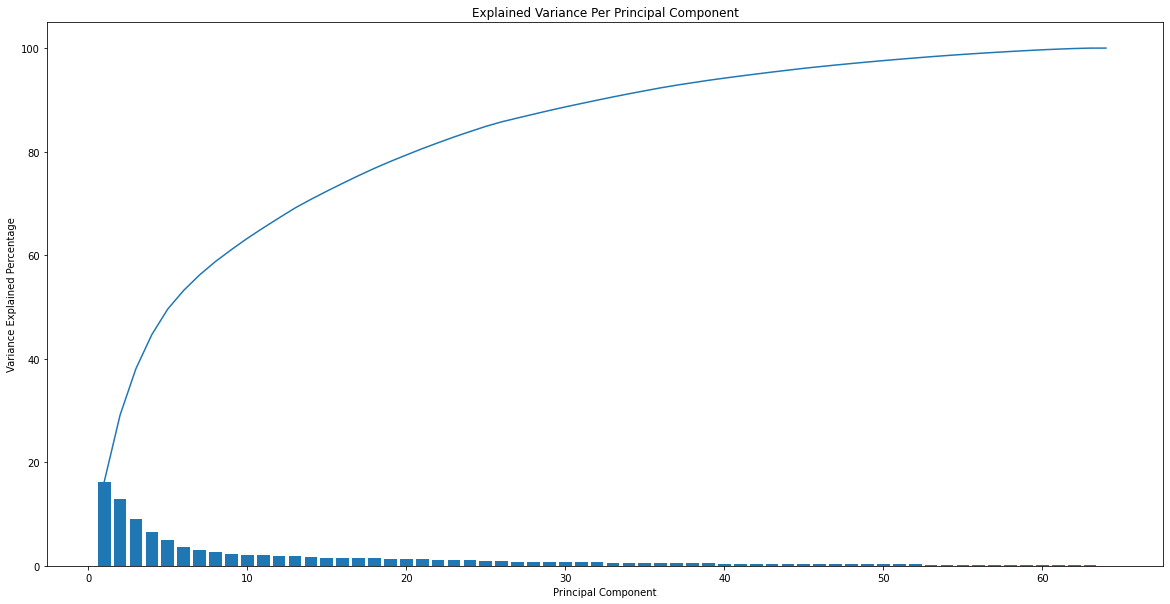

In [ ]:
# plot PCA results
def scree_plot(results):
    """

    Creates a scree plot associated with the principal components .
    
    Args:
        results: The Dataframe results from pca_results function.

   Returns:
        None.

    """

    n_components = np.arange(len(results)) + 1
    ev = results.explained_variance *100
    cum_ev = results.cumulative_variance_explained*100

    fig, ax = plt.subplots(figsize=(20,10))
    plt.bar(n_components, ev )
    plt.plot(cum_ev)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained Percentage")
    plt.title('Explained Variance Per Principal Component');


#------------------------------------------------------------------------

scree_plot(results)

In [ ]:
# Find number of components to get 80% cumulative_variance_explained"
results[((results["cumulative_variance_explained"]*100) >79) & ((results["cumulative_variance_explained"]*100) <81)]

,explained_variance,cumulative_variance_explained,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Adolescence_Decade,Adolescence_Mainstream,CAMEO_INTL_2015_Wealth,CAMEO_INTL_2015_life_stage
20,0.012496,0.793515,-0.045960,0.017864,-0.080099,-0.036162,0.127605,-0.044847,-0.061567,0.21111,0.014802,-0.079291,-0.036901,-0.024579,0.007627,0.026861,-0.068781,-0.034528,-0.024671,-0.050130,-0.028331,0.011271,-0.059702,-0.040326,-0.020147,0.018030,0.025961,0.003826,0.126167,0.131557,0.506349,0.061384,0.009074,-0.137071,-0.178726,-0.353437,-0.049687,0.040129,0.014758,-0.035345,-0.026257,-0.042887,0.089138,-0.026456,-0.052759,0.011563,-0.033410,-0.195843,-0.071729,-0.044540,0.080746,-0.065471,-0.021604,0.181632,-0.261142,-0.199881,-0.121725,-0.014367,0.112469,0.096302,0.046468,0.096389,-0.059744,-0.016207,0.112945,-0.380275
21,0.012198,0.805713,0.028742,-0.008251,0.032446,-0.023760,-0.025686,0.023574,-0.162484,-0.00488,0.272718,0.166326,0.065664,-0.017005,0.012187,-0.018780,0.097324,-0.002796,-0.028996,0.036431,0.027350,0.018346,0.016622,0.045171,0.010716,0.006259,-0.007356,0.017117,-0.116407,-0.026180,-0.312692,0.043780,-0.057556,-0.109238,0.177785,0.204262,0.056506,-0.010458,-0.214624,-0.136779,0.242928,0.201547,-0.167392,-0.011863,-0.072678,-0.041303,-0.063472,-0.085636,0.095166,-0.068942,0.013851,0.084524,0.022081,0.126578,-0.236892,-0.157947,-0.119128,-0.012098,0.072500,0.032730,0.028968,-0.172779,0.000031,-0.267871,0.175132,-0.397401


In [ ]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca ,df_pca = do_pca(21, df)
results , weights  = pca_results(pca)  
results


,explained_variance,cumulative_variance_explained,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Adolescence_Decade,Adolescence_Mainstream,CAMEO_INTL_2015_Wealth,CAMEO_INTL_2015_life_stage
1,0.161739,0.161739,-0.100017,0.011374,-0.216934,0.130590,-0.094909,0.054833,0.056320,0.179893,-0.103602,0.027656,-0.007722,0.039479,0.065353,0.097956,0.062808,-0.045464,-0.055145,-0.061225,0.059510,0.078458,0.007481,0.027363,0.043141,0.096184,0.070504,-0.002064,0.029615,-0.083247,-0.003328,0.214689,0.045464,-0.050995,0.142264,0.038752,-0.175357,-0.178322,-0.051034,-0.217193,0.009275,0.129939,0.150907,-0.214558,-0.129918,0.203388,-0.167979,-0.121094,0.040568,-0.237695,-0.057568,0.069310,-0.080509,-0.222394,0.155391,0.226193,0.216738,0.042713,-0.165850,0.147747,0.202666,0.140367,0.080822,0.100880,0.210898,-0.121126
2,0.129333,0.291072,0.264125,0.083424,0.087440,-0.250103,0.241060,-0.214700,-0.240837,0.110699,-0.001778,-0.056535,0.163075,-0.098258,-0.184462,-0.262887,-0.164838,-0.064165,0.188955,0.230850,-0.214069,-0.174352,0.106918,0.064383,0.099472,-0.224552,-0.230681,-0.001612,0.033206,-0.053296,0.007789,0.041421,0.116218,0.072751,0.050710,0.029385,-0.055537,-0.173375,-0.015434,-0.049027,-0.008442,0.025745,0.048916,-0.061291,-0.047744,0.074171,-0.057416,-0.032627,-0.001499,-0.058742,-0.162241,0.012561,-0.027455,-0.062712,0.048252,0.067319,0.062602,0.009505,-0.050984,0.052955,0.071302,0.052526,-0.256330,0.000233,0.054744,0.014647
3,0.089875,0.380948,0.069806,-0.371158,0.158974,-0.102381,0.096041,-0.187994,-0.098166,-0.044880,0.052075,-0.019221,0.102486,0.266162,0.253622,0.080122,0.056377,0.349916,0.061441,-0.183639,0.241167,-0.206853,-0.282039,-0.306312,-0.331115,-0.067298,-0.069504,0.000350,0.013026,-0.003575,0.009962,-0.022215,0.086149,0.038391,0.021728,0.013243,-0.034799,-0.105587,-0.007802,-0.010979,-0.008991,0.001145,0.018472,-0.016077,-0.031382,0.042213,-0.037621,-0.027273,-0.015510,-0.017524,-0.050671,-0.006694,-0.019813,-0.034452,0.025405,0.035593,0.035155,0.004163,-0.029497,0.029695,0.041698,0.028580,-0.100827,-0.049711,0.021243,-0.004691
4,0.065762,0.446710,0.056212,-0.028039,0.030096,-0.043643,0.019219,-0.045373,-0.015417,-0.056970,-0.057207,-0.030837,0.053402,-0.018458,0.008692,-0.051356,0.020069,0.060304,-0.013272,0.021405,-0.032475,-0.046384,0.023621,-0.047114,-0.010706,-0.064914,-0.048831,-0.001010,-0.034513,-0.042646,-0.001817,-0.012904,0.004564,-0.065063,0.026258,0.006307,-0.008277,0.929453,-0.089881,-0.101600,-0.026669,0.055178,0.073099,-0.081286,-0.019046,0.021915,-0.037922,-0.023444,0.025194,-0.093954,-0.007402,0.029140,-0.046454,-0.093005,0.020928,0.069995,0.079783,-0.018220,-0.083721,0.048779,0.031330,0.020621,-0.029776,0.055662,0.038306,-0.036367
5,0.049274,0.495984,-0.038669,0.036852,0.073320,-0.005789,-0.017965,-0.129313,0.087102,-0.126859,0.387421,0.005868,0.008116,-0.001637,-0.022060,-0.010193,0.017976,-0.010997,-0.003200,-0.020050,-0.038956,0.048108,0.020315,0.109179,0.080470,0.010872,0.055541,0.002055,0.014844,0.108314,0.050754,-0.266380,-0.093491,0.003225,-0.030227,0.040840,-0.153831,0.054079,0.105077,0.088424,-0.002963,-0.070766,-0.025670,0.048929,-0.242414,0.272533,-0.230223,-0.090977,-0.251577,0.057812,0.144899,-0.190598,0.049992,-0.056256,0.105685,0.105001,0.087224,0.140816,0.030215,0.059718,0.257977,0.100412,0.040186,-0.3

### Discussion 2.2: Perform Dimensionality Reduction

**- After applying dimensionality reduction by Principal component analysis(PCA)
we found that  21  Components give 80% cumulative variance explained and it should be an acceptable ratio as the thresh hold for those cases is 60 % .**

-**Thus we will move forward with 21 Components.** 

### Step 2.3: Interpret Principal Components



                                   1
PLZ8_ANTG3                  0.226193
PLZ8_ANTG4                  0.216738
HH_EINKOMMEN_SCORE          0.214689
CAMEO_INTL_2015_Wealth      0.210898
EWDICHTE                    0.203388
ORTSGR_KLS9                 0.202666
FINANZ_HAUSBAUER            0.179893
PLZ8_ANTG2                  0.155391
KBA05_ANTG4                 0.150907
ARBEIT                      0.147747
ANZ_HAUSHALTE_AKTIV         0.142264
RELAT_AB                    0.140367
FINANZ_SPARER               0.130590
KBA05_ANTG3                 0.129939
Adolescence_Mainstream      0.100880
SEMIO_REL                   0.097956
SEMIO_PFLICHT               0.096184
Adolescence_Decade          0.080822
SEMIO_RAT                   0.078458
SEMIO_TRADV                 0.070504
REGIOTYP                    0.069310
SEMIO_FAM                   0.065353
SEMIO_MAT                   0.062808
SEMIO_KULT                  0.059510
FINANZ_UNAUFFAELLIGER       0.056320
FINANZ_ANLEGER              0.054833
W

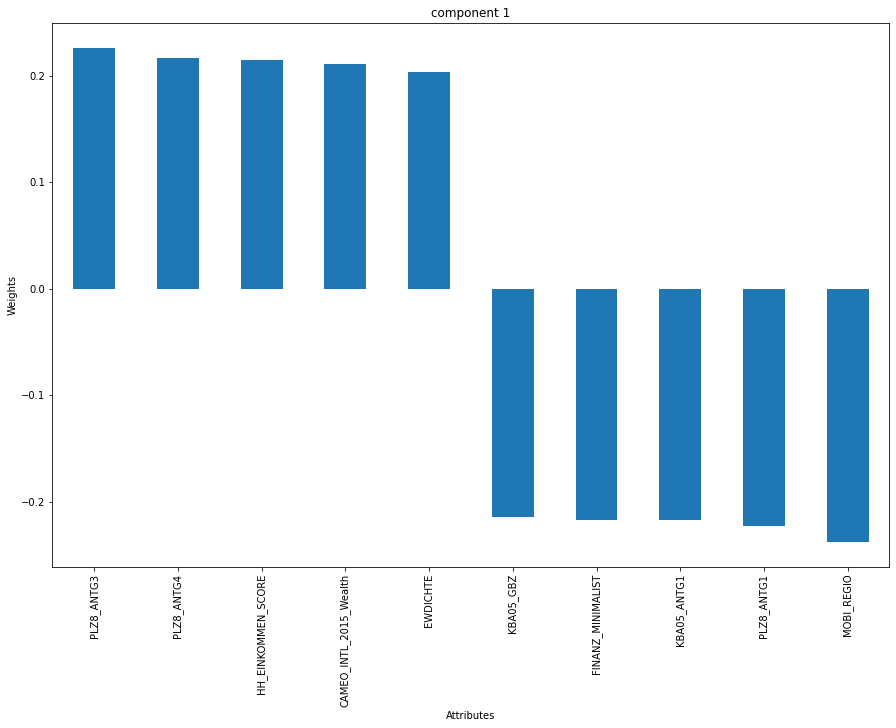

In [ ]:
# Map weights for the first principal component to corresponding feature names

def plot_component_weight(component,range):
    """
    Calculate the weights for each component and compare
    the highest weights attributes with the lowest weights attributes.

    Args :         
        component : Principal Component Number .
        range : Range of the attributes.

    Returns :
        None

    """

    weight = pd.DataFrame(weights.T[component].sort_values(ascending=False))
    weight_max = weight.head(range)
    weight_min = weight.tail(range)
    groub = pd.concat([weight_max,weight_min])

    groub.plot(kind='bar',legend=None,figsize=(15,10))
    plt.xlabel("Attributes")
    plt.ylabel("Weights")
    plt.title(f"component {component}")

    print(weight,"\n\n"),
    print(f"High\n\n{weight_max},\n\n") ,
    print(f"Low\n\n{weight_min},\n\n")


#---------------------------------------------------------------------
# beverly hill vs the projects
plot_component_weight(1,5)

                                   2
ALTERSKATEGORIE_GROB        0.264125
FINANZ_VORSORGER            0.241060
SEMIO_ERL                   0.230850
SEMIO_LUST                  0.188955
RETOURTYP_BK_S              0.163075
W_KEIT_KIND_HH              0.116218
FINANZ_HAUSBAUER            0.110699
SEMIO_KRIT                  0.106918
SEMIO_KAEM                  0.099472
FINANZ_MINIMALIST           0.087440
ANREDE_KZ                   0.083424
EWDICHTE                    0.074171
WOHNDAUER_2008              0.072751
ORTSGR_KLS9                 0.071302
PLZ8_ANTG3                  0.067319
SEMIO_DOM                   0.064383
PLZ8_ANTG4                  0.062602
CAMEO_INTL_2015_Wealth      0.054744
ARBEIT                      0.052955
RELAT_AB                    0.052526
ANZ_HAUSHALTE_AKTIV         0.050710
KBA05_ANTG4                 0.048916
PLZ8_ANTG2                  0.048252
HH_EINKOMMEN_SCORE          0.041421
VERS_TYP                    0.033206
ANZ_HH_TITEL                0.029385
K

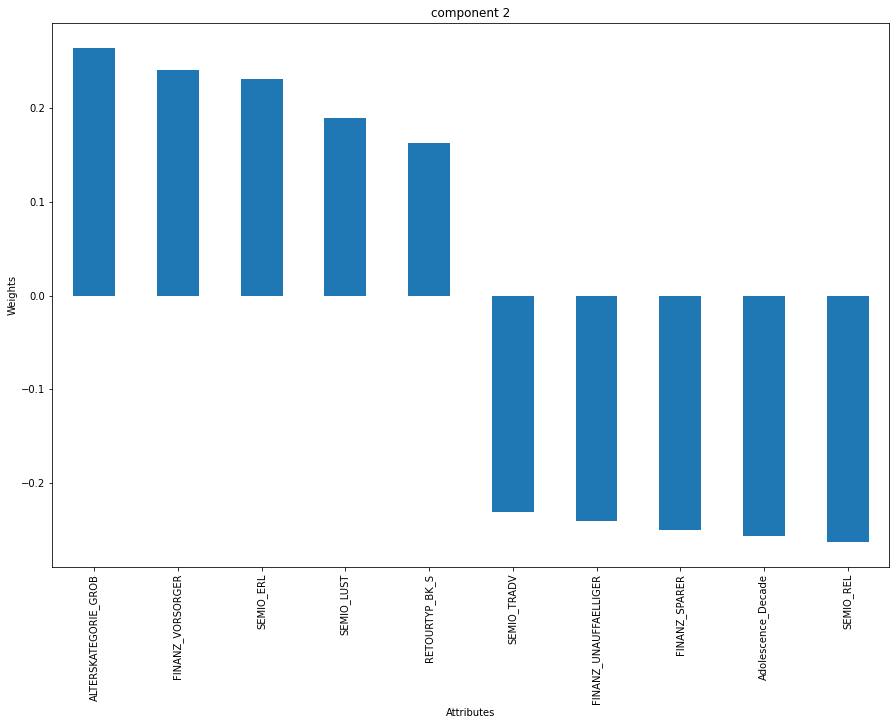

In [ ]:
# Map weights for the second principal component to corresponding feature names
# old low stubborn ,young low reckless 
plot_component_weight(2,5)


                                   3
SEMIO_VERT                  0.349916
SEMIO_SOZ                   0.266162
SEMIO_FAM                   0.253622
SEMIO_KULT                  0.241167
FINANZ_MINIMALIST           0.158974
RETOURTYP_BK_S              0.102486
FINANZ_VORSORGER            0.096041
W_KEIT_KIND_HH              0.086149
SEMIO_REL                   0.080122
ALTERSKATEGORIE_GROB        0.069806
SEMIO_LUST                  0.061441
SEMIO_MAT                   0.056377
GREEN_AVANTGARDE            0.052075
EWDICHTE                    0.042213
ORTSGR_KLS9                 0.041698
WOHNDAUER_2008              0.038391
PLZ8_ANTG3                  0.035593
PLZ8_ANTG4                  0.035155
ARBEIT                      0.029695
RELAT_AB                    0.028580
PLZ8_ANTG2                  0.025405
ANZ_HAUSHALTE_AKTIV         0.021728
CAMEO_INTL_2015_Wealth      0.021243
KBA05_ANTG4                 0.018472
ANZ_HH_TITEL                0.013243
VERS_TYP                    0.013026
A

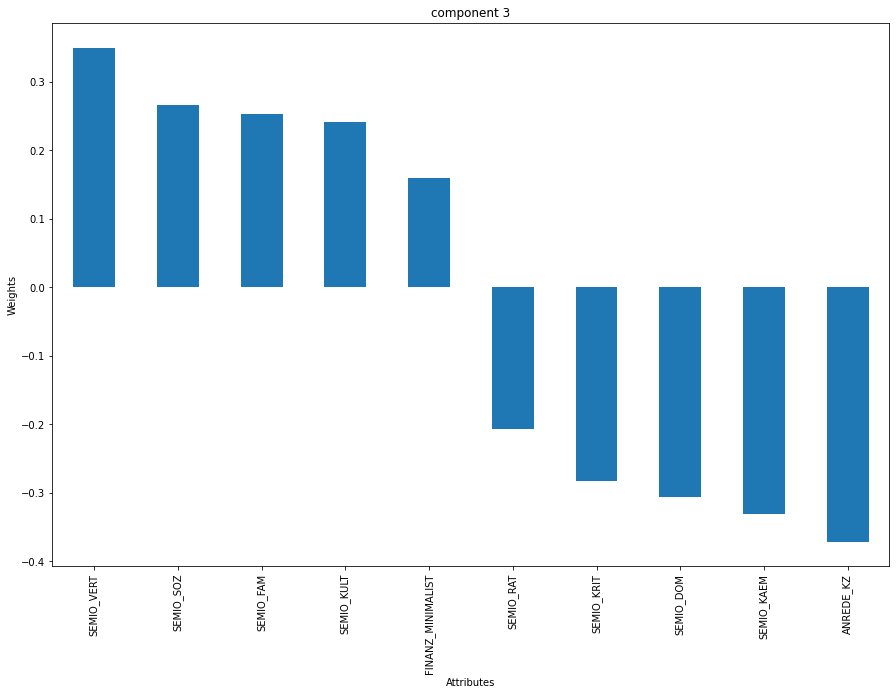

In [ ]:
# Map weights for the third principal component to corresponding feature names
# dangerous.
plot_component_weight(3,5)


###  Discussion 2.3: Interpret Principal Components

**-The first component seems to capture  Population density with wealth with positive weights going to crowded areas and negative for high-level areas as follows:**
( beverly hill vs the projects)
*    **Positive weights: goes to crowded areas of region PLZ8_ANTG3-PLZ8_ANTG4, households net income and wealth,density of households per square kilometer.**

*    **Negative weights: goes to the low number of homes in microcell region, financial minimalist, low number of families in mico-cell region, low number of homes in PLZ8_ANTG1 region, movement patterns** 


**-The second component seems to capture age, generation, financial mentality, Personality typology, and religion as follows:**
(old low stubborn ,young low reckless)
*    **Positive weights: goes to age segments, financial provision,event-oriented,sensual-minded, and investment mentality.**

*    **Negative weights: goes to tradional-minded, low financial income, financial savings ,generation and  religion.** 



**-The third component seems to capture emtional and rationality personality topology associated with gender and financial minimalist follows:**(dangerous)

*    **Positive weights: goes to emotional personality topology associated
 with financial minimalist (dreamful, socially, family, and cultural minded +financial minimalist).**

*    **Negative weights: goes to rationality personality topology associated with gender (rational, critical, dominant, and combative minded + gender ).** 

## Step 3: Clustering



### Step 3.1: Apply Clustering to General Population



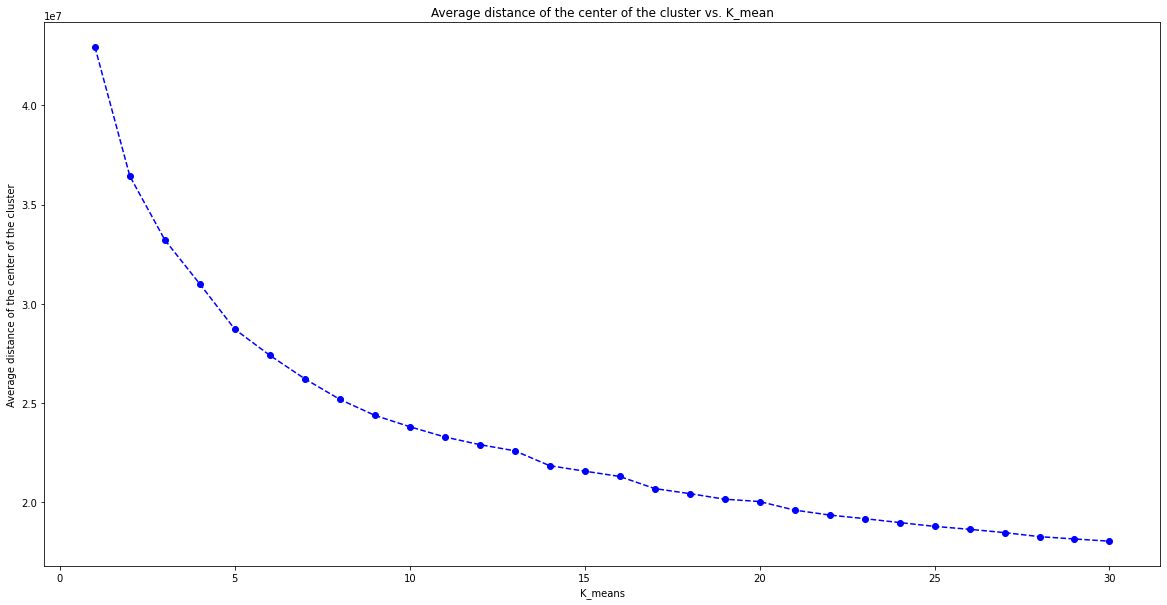

In [ ]:
# Investigate the change in within-cluster distance across number of clusters.

def elbow_plot(data, max_center_range =int):
    """
    Calculate the kmeans score regarding SSE for points to centers and plot it 

    Args:
        data: Data to fit kmeans 
        max_center_range: The number of centers (the k value)

    Returns :
        scores_results: A Dataframe contains the SSE score for each center
         
    """
    
    scores = []
    centers = list(range(1,max_center_range+1))

    for center in centers:
        kmeans = KMeans(n_clusters=center,random_state=42)
        model = kmeans.fit(data)
        score = np.abs(model.score(data))
        scores.append(score)
    
    scores_results =pd.DataFrame(scores ,index = centers )
    
    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(centers,
             scores,
             linestyle='--',
             marker='o',
             color='b',             
        )
    
    plt.xlabel("K_means")
    plt.ylabel('Average distance of the center of the cluster');
    plt.title('Average distance of the center of the cluster vs. K_mean')
    plt.show();
    
    
    
    return scores_results

#-----------------------------------------------------------------------------

scores_results = elbow_plot(df_pca,30)


In [ ]:
scores_results

,0
1,4.293423e+07
2,3.642198e+07
3,3.321320e+07
4,3.099575e+07
5,2.871866e+07
6,2.740639e+07
7,2.622505e+07
8,2.518806e+07
9,2.438430e+07
10,2.381211e+07


In [ ]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

n_clusters = 8

kmeans = KMeans(n_clusters=n_clusters ,random_state=42)
K_model = kmeans.fit(df_pca)
general_K =K_model.predict(df_pca)

### Discussion 3.1: Apply Clustering to General Population

**- The difference in Average distance hugely decreases after 8 clusters ,thus we will fit our data with 8 clusters.**

### Step 3.2: Apply All Steps to the Customer Data



In [ ]:
# Load in the customer demographics data.
# Data cleaning
customers = clean_data("/content/drive/MyDrive/Data/Udacity_CUSTOMERS_Subset.csv",
                       "/content/drive/MyDrive/Data/AZDIAS_Feature_Summary.csv")

The data-set has 141035 row and 64 column .


In [ ]:
# Feature Transformation

# Impute
customers[customers.columns] = imputer.transform(customers[customers.columns])

# Scale
customers[customers.columns] = scaler.transform(customers[customers.columns])

# Dimensionality Reduction
dfc_pca = pca.transform(customers)


#--------------------------------------------------------------------------

# Clustering
customers_K = K_model.predict(dfc_pca)




### Step 3.3: Compare Customer Data to Demographics Data




In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

general_proportion = []
customers_propotion= []
clusters = list(range(1,len(np.unique(general_K))+1))


for i in clusters:
    general_proportion.append(( general_K  == i-1 ).sum()/len( general_K ))
    customers_propotion.append(( customers_K == i-1 ).sum()/len( customers_K ))


proportion = pd.DataFrame({"general_proportion" :general_proportion,
                           "customers_propotion":customers_propotion},                            
                            index = clusters )

proportion["Diff"] = (
    proportion.customers_propotion - proportion.general_proportion 
    )

proportion.sort_values("Diff")



,general_proportion,customers_propotion,Diff
7,0.126541,0.015592,-0.110949
3,0.109905,0.011153,-0.098751
4,0.112537,0.018414,-0.094123
6,0.132498,0.104329,-0.028170
8,0.139063,0.123601,-0.015463
2,0.052123,0.043847,-0.008275
1,0.150793,0.185266,0.034473
5,0.176540,0.497798,0.321258


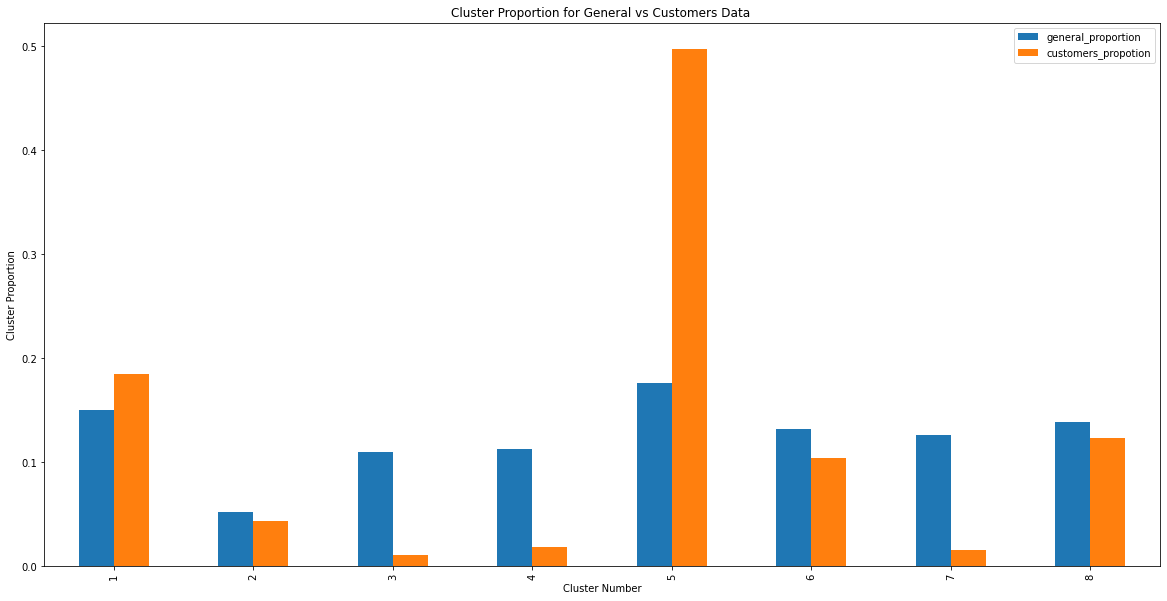

In [ ]:
# plot the proportion of data in each cluster for General and Customers Data 

fig, ax = plt.subplots(figsize=(20,10))
proportion.drop("Diff", axis = 1).plot(kind="bar",ax=ax)
plt.xlabel("Cluster Number")
plt.ylabel('Cluster Proportion')
plt.title("Cluster Proportion for General vs Customers Data ");


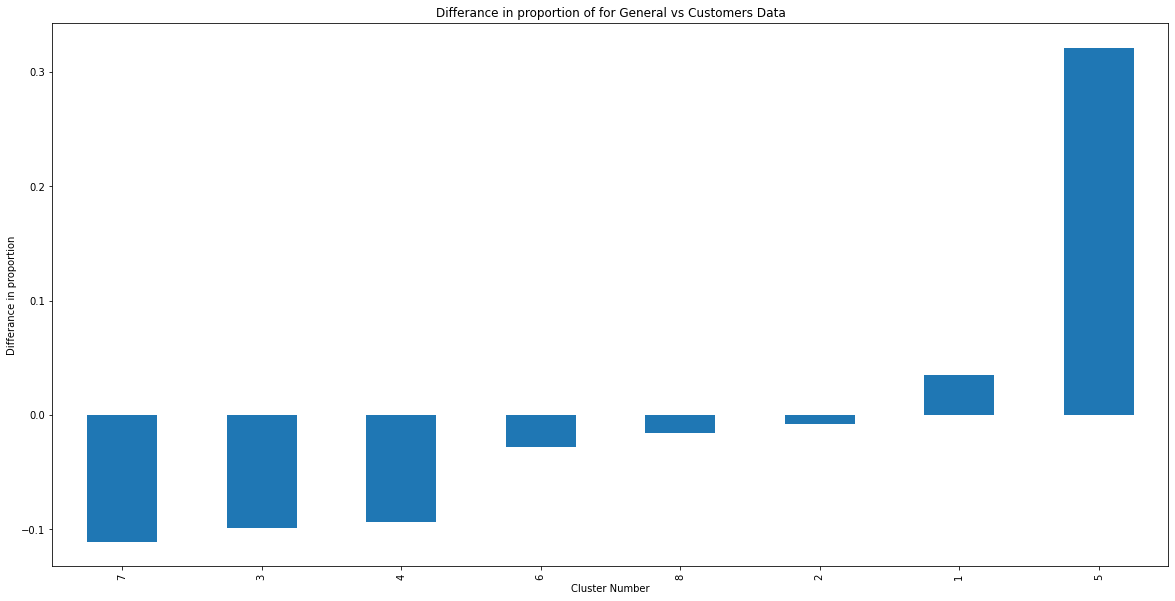

In [ ]:
# plot the  differance in proportion of data in each cluster 
# for General and Customers Data 

fig, ax = plt.subplots(figsize=(20,10))
proportion["Diff"].sort_values().plot(kind="bar",ax=ax)
plt.xlabel("Cluster Number")
plt.ylabel('Differance in proportion')
plt.title("Differance in proportion of for General vs Customers Data");


In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
def cluster_attributes(cluster_number):
    """ 
    Calculates the most appeared attributes for the individuals in the cluster

    Args : 
        cluster_number : The number of the cluster

    Returns : 
        None

    """

    clu  =scaler.inverse_transform(
        pca.inverse_transform(
            dfc_pca[np.where(customers_K== (cluster_number-1) )]
            )
        ).round()

    df_c = pd.DataFrame(
            clu,
            index = np.array(range(0, clu.shape[0])),
            columns=customers.columns
            )


    cluster =(pca.inverse_transform(
        kmeans.cluster_centers_[(cluster_number-1)])
    )

    cluster_groub = pd.DataFrame(cluster, index = customers.columns)

    k = cluster_groub.sort_values(0,ascending=False)

    weight_max = k.head(5)

    weight_min = k.tail(5)

    groub = pd.concat([weight_max,weight_min])


    groub.index

    for col in groub.index:
        print(col)
        print(df_c[col].mode())
        print(50*"*")

#-------------------------------------------------------------------------
# overrepresented Groub .
cluster_attributes(5)


FINANZ_MINIMALIST
0    5.0
dtype: float64
**************************************************
SEMIO_VERT
0    6.0
dtype: float64
**************************************************
MOBI_REGIO
0    4.0
dtype: float64
**************************************************
KBA05_ANTG1
0    3.0
dtype: float64
**************************************************
KBA05_GBZ
0    4.0
dtype: float64
**************************************************
SEMIO_DOM
0    3.0
dtype: float64
**************************************************
FINANZ_HAUSBAUER
0    2.0
dtype: float64
**************************************************
HH_EINKOMMEN_SCORE
0    2.0
dtype: float64
**************************************************
SEMIO_KAEM
0    3.0
dtype: float64
**************************************************
ANREDE_KZ
0    1.0
dtype: float64
**************************************************


In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
# underrepresented groub 1
cluster_attributes(7)

SEMIO_KULT
0    7.0
dtype: float64
**************************************************
SEMIO_FAM
0    7.0
dtype: float64
**************************************************
SEMIO_REL
0    7.0
dtype: float64
**************************************************
FINANZ_SPARER
0    4.0
dtype: float64
**************************************************
SEMIO_SOZ
0    6.0
dtype: float64
**************************************************
SEMIO_DOM
0    3.0
dtype: float64
**************************************************
SEMIO_KRIT
0    2.0
dtype: float64
**************************************************
SEMIO_KAEM
0    2.0
dtype: float64
**************************************************
ANREDE_KZ
0    1.0
dtype: float64
**************************************************
SEMIO_ERL
0    2.0
dtype: float64
**************************************************


In [ ]:
# underrepresented groub 2
cluster_attributes(3)

SEMIO_RAT
0    7.0
dtype: float64
**************************************************
FINANZ_SPARER
0    4.0
dtype: float64
**************************************************
SEMIO_PFLICHT
0    7.0
dtype: float64
**************************************************
ANREDE_KZ
0    2.0
dtype: float64
**************************************************
FINANZ_ANLEGER
0    4.0
dtype: float64
**************************************************
MOBI_REGIO
0    1.0
dtype: float64
**************************************************
FINANZ_VORSORGER
0    2.0
dtype: float64
**************************************************
SEMIO_VERT
0    2.0
dtype: float64
**************************************************
ALTERSKATEGORIE_GROB
0    2.0
dtype: float64
**************************************************
FINANZ_MINIMALIST
0    1.0
dtype: float64
**************************************************


### Discussion 3.3: Compare Customer Data to Demographics Data

**- Kinds of people are part of a cluster that is overrepresented in the customer data compared to the general population :**


*  FINANZ_MINIMALIST : 5 : very low financial MINIMALISM

*  SEMIO_VERT VERT:  6 : very low affinity dreamful-minded

*  MOBI_REGIO : 4 : low movement pattern

*  KBA05_ANTG1 : 3 : live in high share of 1-2 family homes in the microcell regien

*  KBA05_GBZ : 4 : live in area 17-22 buildings in the microcell regien

*  SEMIO_DOM :3: high affinity dominant-minded

*  FINANZ_HAUSBAUER : 2 : high homes ownership

*  HH_EINKOMMEN_SCORE : 2 : very high income Estimated household net income

*  SEMIO_KAEM  high : 3 : high affinity combative attitude

*  ANREDE_KZ : Gender 1 :  male


---


**- kinds of people are part of a clusters that is uderrepresented in the customer data compared to the general population :**

* **Group 1 :** 

    * SEMIO_KULT : 7: lowest affinity cultural-minded

    * SEMIO_FAM : 7 : lowest affinity family-minded

    * SEMIO_REL : 7 : lowest affinity religious

    * FINANZ_SPARER : 4 : low money-saver

    * SEMIO_SOZ : 6 : very low affinity socially-minded

    * SEMIO_DOM : 3 : high affinity dominant-minded

    * SEMIO_KRIT : 2 : very high affinity critical-minde

    * SEMIO_KAEM : 2  : very high affinity combative attitude

    * ANREDE_KZ  : Gender 1 :  male 

    * SEMIO_ERL : 2 : very high affinity event-oriented

* **Group 2 :** 

    * SEMIO_RAT : 7 : lowest affinity rational

    * FINANZ_SPARER : 4 : low money-saver

    * SEMIO_PFLICHT : 7 : lowest affinity dutiful

    * ANREDE_KZ : Gender 2 : female

    * FINANZ_ANLEGER : 4 : low investor

    * MOBI_REGIO : 1 : very high movement

    * FINANZ_VORSORGER : 2 : high level on be prepared
         
    * SEMIO_VERT : 2 : very high affinity  dreamful-minded

    * ALTERSKATEGORIE_GROB : 2 : has  30 - 45 years old Estimated age

    * FINANZ_MINIMALIST  : 1 : very high financial MINIMALISM 

